# Data Loading

Dataset Link: https://www.kaggle.com/datasets/brendan45774/test-file

In [94]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=FutureWarning)

# Load the dataset
data = pd.read_csv('tested.csv')

# Display the first few rows to check the data
print(data.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


# Data Preprocessing

In [97]:
# Check the column names
print("Column names in the dataset:", data.columns)

# 1. Handle missing values
# Fill missing 'Age' with the mean age
data['Age'] = data['Age'].fillna(data['Age'].mean())

# Fill missing 'Cabin' with 'Unknown'
data['Cabin'] = data['Cabin'].fillna('Unknown')

# Fill missing 'Embarked' with the most frequent (mode) value
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

# 2. Convert categorical variables to numeric
# 'Sex' column - male=0, female=1
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})

# 3. Drop irrelevant or redundant columns (if they exist in your dataset)
# Check and drop columns 'Name' and 'Ticket' only if they exist
columns_to_drop = ['Name', 'Ticket']
existing_columns_to_drop = [col for col in columns_to_drop if col in data.columns]
data.drop(existing_columns_to_drop, axis=1, inplace=True)

# 4. Handle any other missing values (in case some are left after the above steps)
data.dropna(inplace=True)

# Display the cleaned dataset
print(data.head())

Column names in the dataset: Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch     Fare    Cabin  \
0          892         0       3    0  34.5      0      0   7.8292  Unknown   
1          893         1       3    1  47.0      1      0   7.0000  Unknown   
2          894         0       2    0  62.0      0      0   9.6875  Unknown   
3          895         0       3    0  27.0      0      0   8.6625  Unknown   
4          896         1       3    1  22.0      1      1  12.2875  Unknown   

  Embarked  
0        Q  
1        S  
2        Q  
3        S  
4        S  


# Visualizations

## Histogram

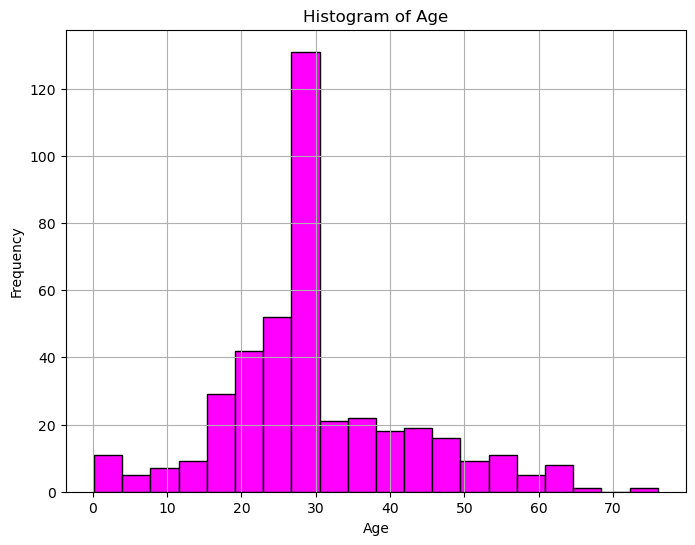

In [99]:
import matplotlib.pyplot as plt

# Create a histogram of 'Age' (you can replace it with any other numeric column)
plt.figure(figsize=(8, 6))
plt.hist(data['Age'], bins=20, color='magenta', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

## Line Graph

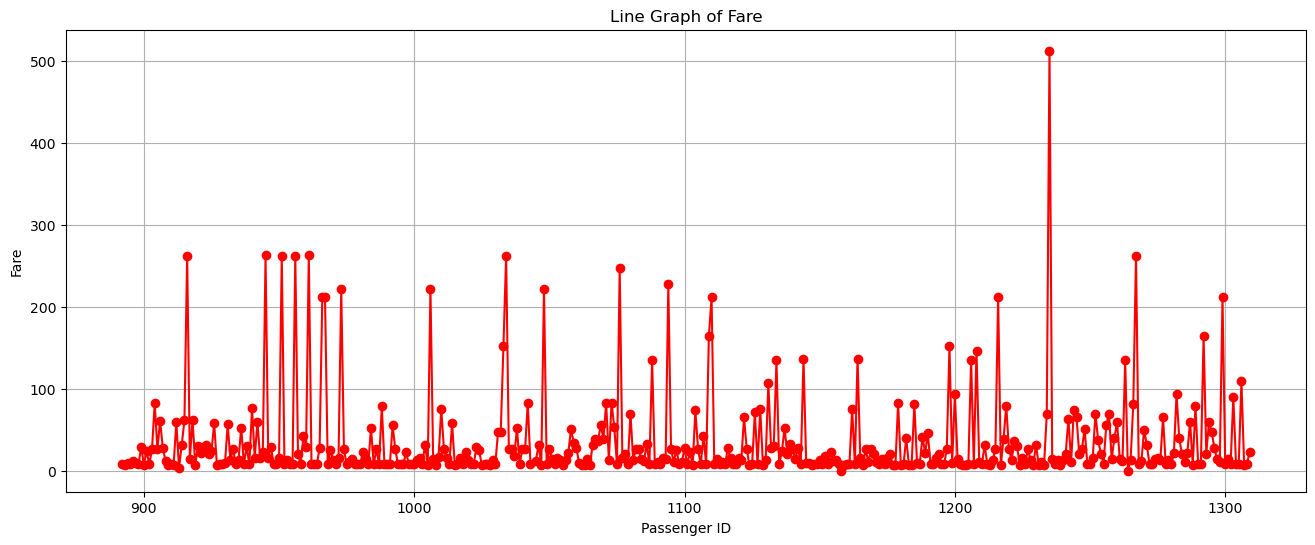

In [101]:
# Create a line graph for 'Fare' over 'PassengerId'
plt.figure(figsize=(16, 6))
plt.plot(data['PassengerId'], data['Fare'], color='red', marker='o')
plt.title('Line Graph of Fare')
plt.xlabel('Passenger ID')
plt.ylabel('Fare')
plt.grid(True)
plt.show()

## Violin Plot

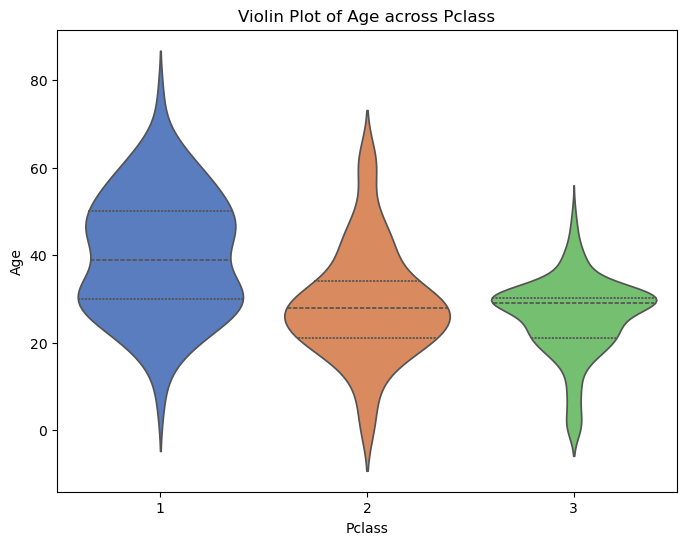

In [103]:
import seaborn as sns

# Create a violin plot of 'Age' across the 'Pclass' categories
plt.figure(figsize=(8, 6))
sns.violinplot(x='Pclass', y='Age', data=data, inner='quart', palette='muted')
plt.title('Violin Plot of Age across Pclass')
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()

## Elbow Plot

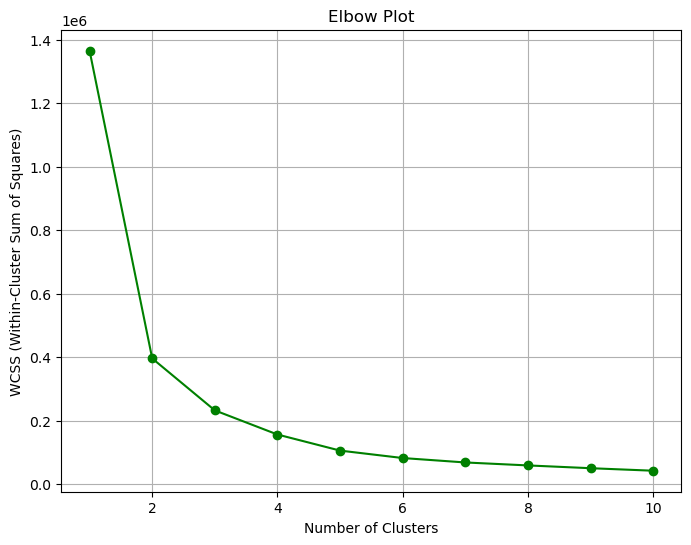

In [105]:
from sklearn.cluster import KMeans
import numpy as np

# Selecting numeric columns for clustering (you can select any relevant columns)
X = data[['Age', 'Fare']].dropna()  # Example with Age and Fare columns

# Compute KMeans for different values of k (number of clusters)
wcss = []  # List to store the Within-Cluster Sum of Squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Create the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', color='g')
plt.title('Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS (Within-Cluster Sum of Squares)')
plt.grid(True)
plt.show()

# K-Means Clustering

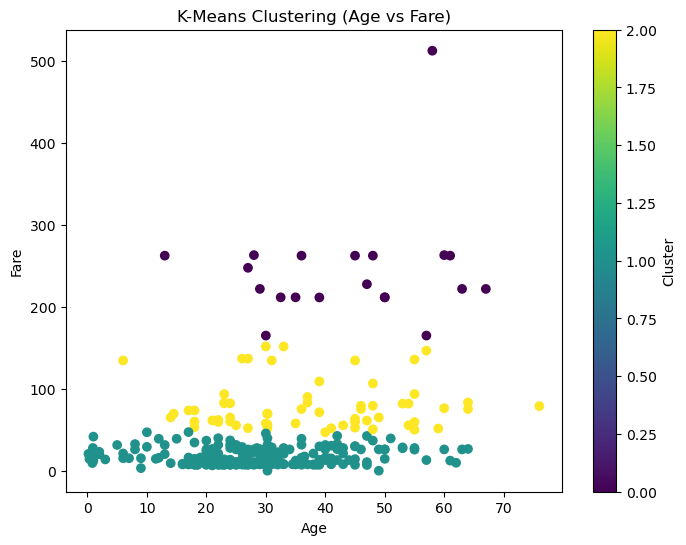

Cluster centers from K-Means:
[[ 43.775      243.882925  ]
 [ 28.07785021  15.13758657]
 [ 37.28811213  79.15786452]]


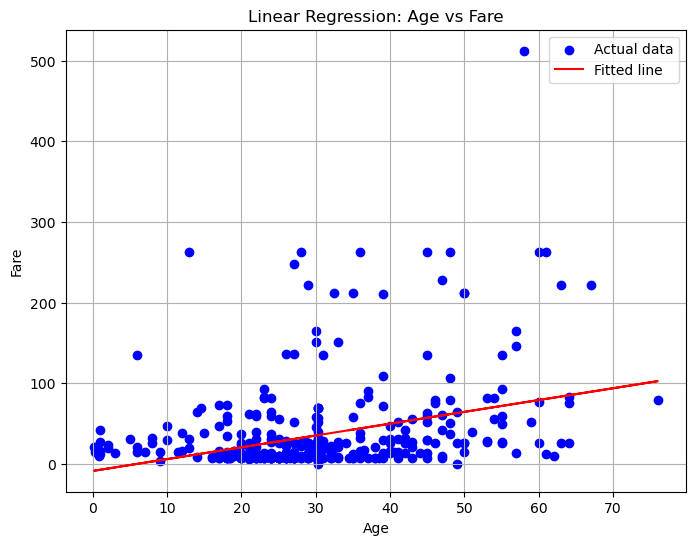

Mean Squared Error (MSE): 2780.5022287349707
R-squared (R²): 0.10828793368830592


In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# --- K-Means Clustering ---
# Select relevant numeric columns (e.g., 'Age' and 'Fare')
X_kmeans = data[['Age', 'Fare']].dropna()  # Drop rows with missing values for clustering

# Apply K-Means clustering (let's assume 3 clusters as an example)
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
data.loc[X_kmeans.index, 'Cluster'] = kmeans.fit_predict(X_kmeans)  # Assign cluster labels to the original data

# Plot K-Means Clusters
plt.figure(figsize=(8, 6))
plt.scatter(data['Age'], data['Fare'], c=data['Cluster'], cmap='viridis')
plt.title('K-Means Clustering (Age vs Fare)')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.colorbar(label='Cluster')
plt.show()

# Print the cluster centers
print("Cluster centers from K-Means:")
print(kmeans.cluster_centers_)


# --- Linear Regression with MSE and R² ---
# Select relevant columns (e.g., 'Age' for independent variable and 'Fare' for dependent variable)
X_reg = data[['Age']].dropna()  # Independent variable (Age)
y_reg = data['Fare'].dropna()   # Dependent variable (Fare)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_reg, y_reg)

# Predict the values using the model
y_pred = model.predict(X_reg)

# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_reg, y_pred)

# Calculate R-squared (R²)
r_squared = r2_score(y_reg, y_pred)

# Plot the Linear Regression line
plt.figure(figsize=(8, 6))
plt.scatter(X_reg, y_reg, color='blue', label='Actual data')
plt.plot(X_reg, y_pred, color='red', label='Fitted line')
plt.title('Linear Regression: Age vs Fare')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()
plt.grid(True)
plt.show()

# Print the MSE and R²
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R²): {r_squared}")